In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from imblearn.over_sampling import SMOTE
import itertools

# Data Cleaning and Preprocessing

In [2]:
#Load the data into a Data Frame
data = pd.read_excel('CTG.xls', sheet_name='Raw Data')
#Data Cleaning and Storing the Cleaned data to .csv file
#remove na values
data = data.dropna()
data.shape
# Drop irrelevant columns
data.drop(['FileName', 'Date', 'SegFile', 'b', 'e', 'LBE', 'DR', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP'], axis =1, inplace=True)
data = data.reset_index()
data.drop(['index'], axis =1, inplace=True)
data.to_csv('cleaned_CTGdata.csv', index=False)
data.columns

Index(['LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL', 'DS',
       'DP', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median',
       'Variance', 'Tendency', 'CLASS', 'NSP'],
      dtype='object')

In [3]:
data.shape

(2126, 23)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   float64
 1   AC        2126 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   ASTV      2126 non-null   float64
 5   MSTV      2126 non-null   float64
 6   ALTV      2126 non-null   float64
 7   MLTV      2126 non-null   float64
 8   DL        2126 non-null   float64
 9   DS        2126 non-null   float64
 10  DP        2126 non-null   float64
 11  Width     2126 non-null   float64
 12  Min       2126 non-null   float64
 13  Max       2126 non-null   float64
 14  Nmax      2126 non-null   float64
 15  Nzeros    2126 non-null   float64
 16  Mode      2126 non-null   float64
 17  Mean      2126 non-null   float64
 18  Median    2126 non-null   float64
 19  Variance  2126 non-null   float64
 20  Tendency  2126 non-null   floa

In [5]:
data.describe()

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000,2126.000000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,2.722484,7.241298,3.659925,46.990122,1.332785,9.84666,8.187629,1.570085,0.003293,...,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,4.509878,1.304327
std,9.840844,3.560850,37.125309,2.847094,17.192814,0.883241,18.39688,5.628247,2.499229,0.057300,...,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,3.026883,0.614377
min,106.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,0.000000,0.000000,...,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000,1.000000
25%,126.000000,0.000000,0.000000,1.000000,32.000000,0.700000,0.00000,4.600000,0.000000,0.000000,...,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,2.000000,1.000000
50%,133.000000,1.000000,0.000000,3.000000,49.000000,1.200000,0.00000,7.400000,0.000000,0.000000,...,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,4.000000,1.000000
75%,140.000000,4.000000,2.000000,5.000000,61.000000,1.700000,11.00000,10.800000,3.000000,0.000000,...,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,7.000000,1.000000
max,160.000000,26.000000,564.000000,23.000000,87.000000,7.000000,91.00000,50.700000,16.000000,1.000000,...,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,10.000000,3.000000


In [6]:
data.isna().sum()

LB          0
AC          0
FM          0
UC          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
DL          0
DS          0
DP          0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
CLASS       0
NSP         0
dtype: int64

In [3]:
data = data.dropna()
data = data.drop_duplicates()
data.columns

Index(['LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL', 'DS',
       'DP', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median',
       'Variance', 'Tendency', 'CLASS', 'NSP'],
      dtype='object')

In [4]:

# Convert target variable to integers
data['NSP'] = data['NSP'].astype(int)
data['CLASS'] = data['CLASS'].astype(int)
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2114 entries, 0 to 2125
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2114 non-null   float64
 1   AC        2114 non-null   float64
 2   FM        2114 non-null   float64
 3   UC        2114 non-null   float64
 4   ASTV      2114 non-null   float64
 5   MSTV      2114 non-null   float64
 6   ALTV      2114 non-null   float64
 7   MLTV      2114 non-null   float64
 8   DL        2114 non-null   float64
 9   DS        2114 non-null   float64
 10  DP        2114 non-null   float64
 11  Width     2114 non-null   float64
 12  Min       2114 non-null   float64
 13  Max       2114 non-null   float64
 14  Nmax      2114 non-null   float64
 15  Nzeros    2114 non-null   float64
 16  Mode      2114 non-null   float64
 17  Mean      2114 non-null   float64
 18  Median    2114 non-null   float64
 19  Variance  2114 non-null   float64
 20  Tendency  2114 non-null   floa

# Data Exploration

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


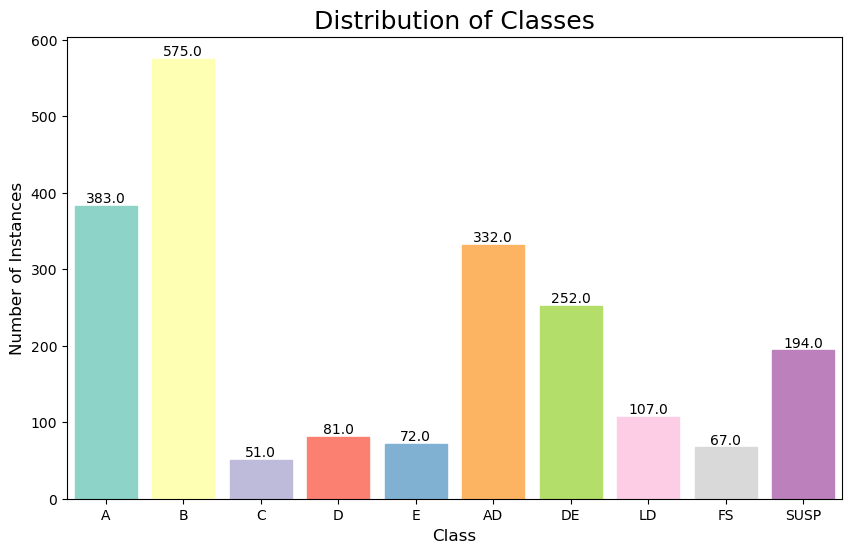

In [5]:
# Visualising the distribution of instances over the CLASS 

color_palette = sns.color_palette("Set3")  # Define a color palette

cnt_srs = data['CLASS'].value_counts()
cnt_srs = cnt_srs.head(10)

plt.figure(figsize=(10, 6))
ax = sns.barplot(cnt_srs.index, cnt_srs.values)
N = 10
ind = np.arange(N)


# Customize color and labels for each bar
for i, bar in enumerate(ax.patches):
    bar.set_color(color_palette[i % len(color_palette)])
    ax.annotate(bar.get_height(), (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.xlabel('Class', fontsize=12)
plt.ylabel('Number of Instances', fontsize=12)
plt.title('Distribution of Classes', fontsize=18)
plt.xticks(ind, ('A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP'))
plt.savefig("image_class.png")
plt.show()



    

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


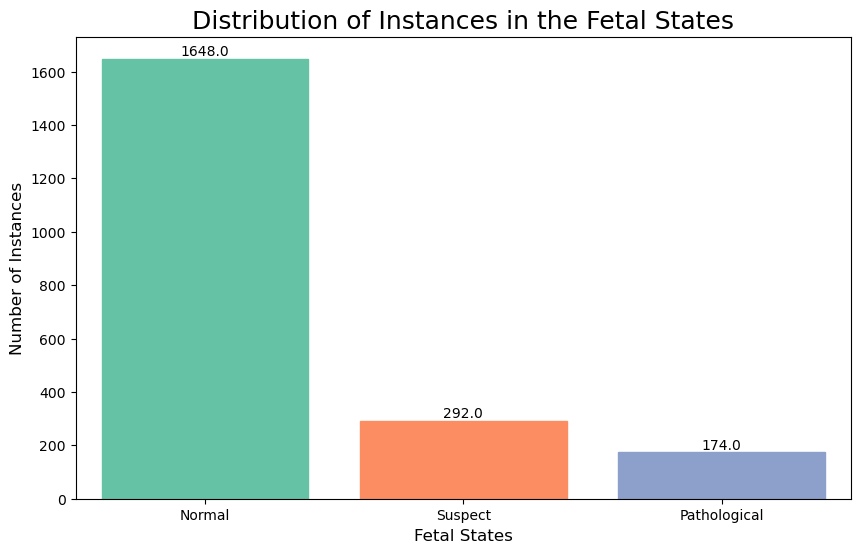

In [6]:
# Visualising the distribution of instances in each fetal States

color_palette = sns.color_palette("Set2")  # Define a color palette

cnt_srs = data['NSP'].value_counts()
cnt_srs = cnt_srs.head(3)

plt.figure(figsize=(10, 6))
ax = sns.barplot(cnt_srs.index, cnt_srs.values)
N = 3
ind = np.arange(N)


# Customize colors and labels for each bar
for i, bar in enumerate(ax.patches):
    bar.set_color(color_palette[i % len(color_palette)])
    ax.annotate(bar.get_height(), (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.xlabel('Fetal States', fontsize=12)
plt.ylabel('Number of Instances', fontsize=12)
plt.title('Distribution of Instances in the Fetal States', fontsize=18)
plt.xticks(ind, ('Normal','Suspect', 'Pathological'))
plt.savefig("image_nsp.png")
plt.show()
    

<Figure size 600x400 with 0 Axes>

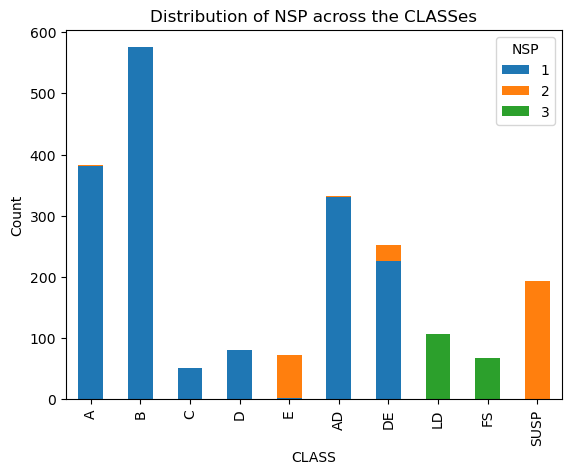

In [7]:
# Visualising the occurence of each NSP in each CLASS category

filtered_data = data[['CLASS', 'NSP']].dropna()

# Count the occurrences of each NSP class within each CLASS category
cross_tab = pd.crosstab(filtered_data['CLASS'], filtered_data['NSP'])

plt.figure(figsize=(6,4))

# Create a stacked bar plot
cross_tab.plot(kind='bar', stacked=True)

# Set labels and title
plt.xlabel('CLASS')
plt.ylabel('Count')
plt.title('Distribution of NSP across the CLASSes')

# Get the tick locations and labels
ind = range(len(cross_tab.index))
tick_labels = cross_tab.index

plt.xticks(ind, tick_labels)  # Set the tick locations and labels
plt.xticks(ind, ('A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP'))
plt.savefig("image_class_nsp.png")
# Show the plot
plt.show()


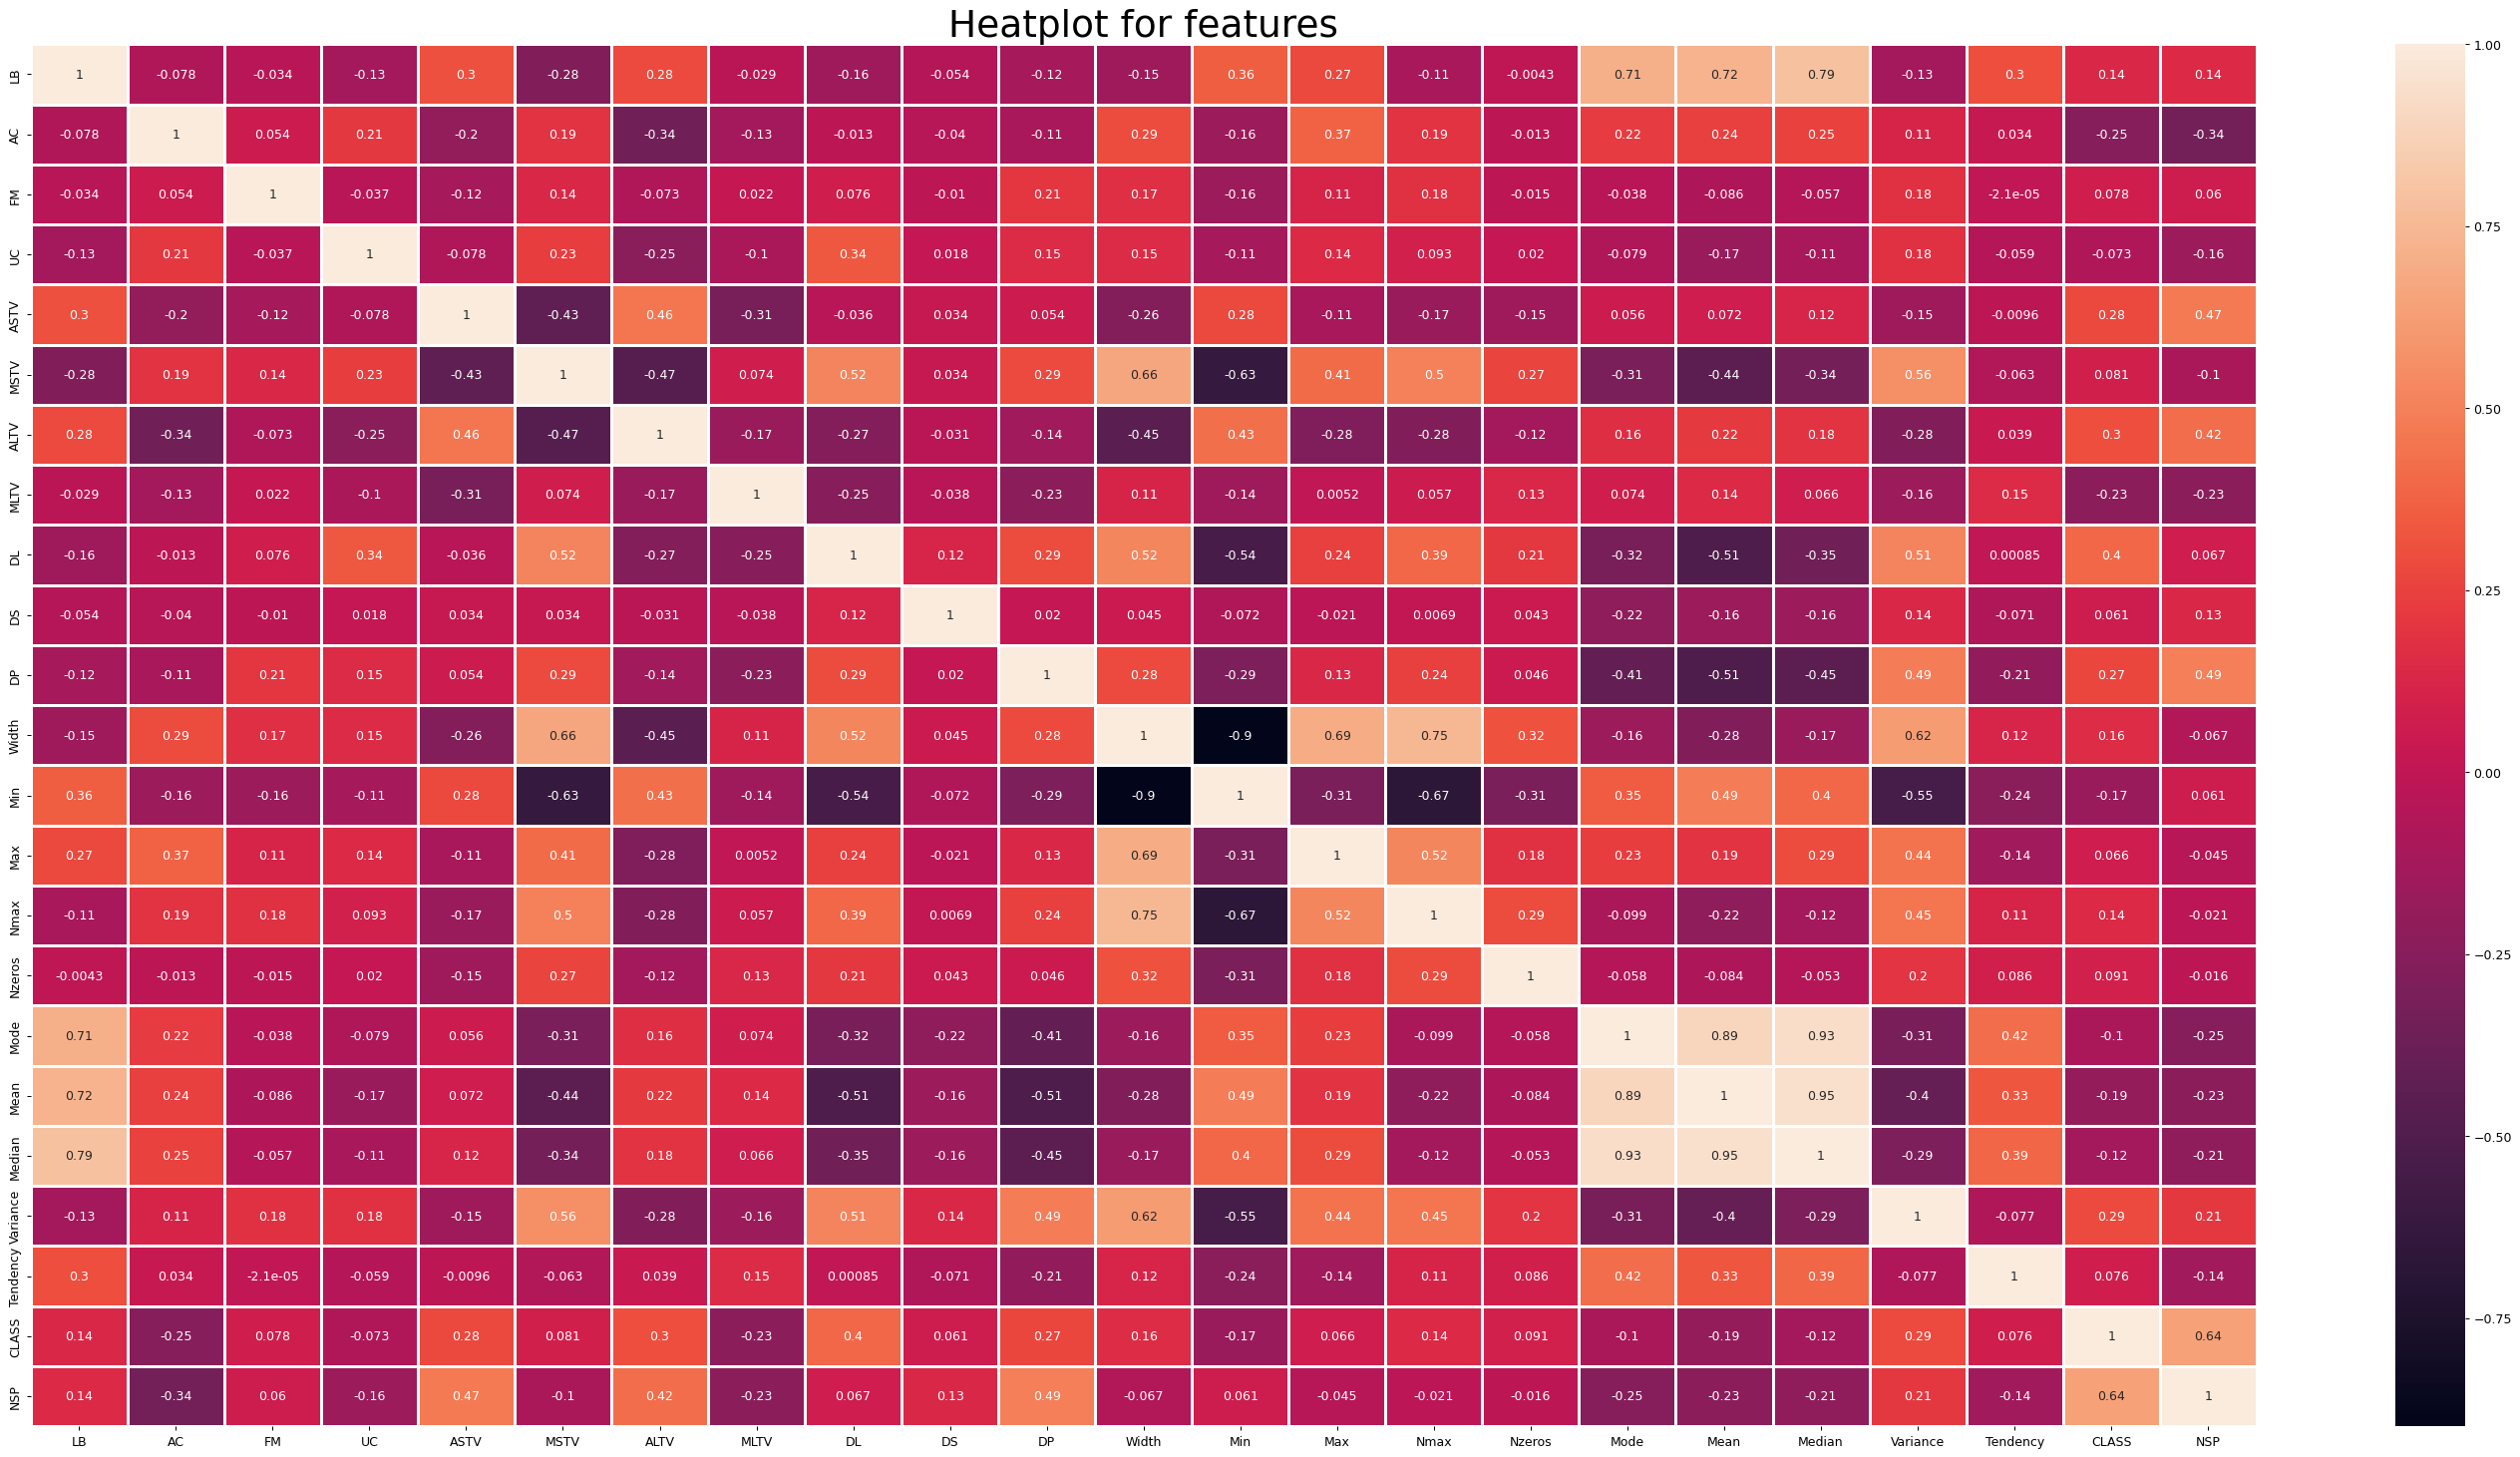

In [8]:
# To check the correlation

plt.figure(figsize=(40, 20), dpi=90) 
sns.heatmap(data.corr(),annot=True,lw=1)
plt.title('Heatplot for features', fontsize=30)
plt.savefig("Heatmap.png")

In [13]:
# To find the highly correlated features
correlation_matrix = data.corr()

# Print the correlation values
print(correlation_matrix)
# Iterate over the correlation matrix and print values greater than 0.60
for column in correlation_matrix:
    for index, value in correlation_matrix[column].items():
        if value > 0.90 and column != index:
            print(f"Correlation between {column} and {index}: {value}")

                LB        AC        FM        UC      ASTV      MSTV  \
LB        1.000000 -0.077720 -0.033759 -0.128801  0.302956 -0.277941   
AC       -0.077720  1.000000  0.053864  0.209835 -0.197369  0.190179   
FM       -0.033759  0.053864  1.000000 -0.037196 -0.117508  0.138359   
UC       -0.128801  0.209835 -0.037196  1.000000 -0.078462  0.230810   
ASTV      0.302956 -0.197369 -0.117508 -0.078462  1.000000 -0.428392   
MSTV     -0.277941  0.190179  0.138359  0.230810 -0.428392  1.000000   
ALTV      0.282097 -0.344484 -0.073307 -0.245155  0.455376 -0.468749   
MLTV     -0.028722 -0.128581  0.021567 -0.104077 -0.314227  0.073672   
DL       -0.156018 -0.013107  0.076039  0.337373 -0.036223  0.516528   
DS       -0.053659 -0.039548 -0.010360  0.018130  0.034181  0.034017   
DP       -0.117315 -0.111222  0.205253  0.151372  0.054345  0.287325   
Width    -0.145585  0.290761  0.171691  0.151873 -0.261031  0.662103   
Min       0.358959 -0.157485 -0.158986 -0.113761  0.276587 -0.62

# Feature Selection

In [9]:
# 4 different feature selection

# First we remove highly correlated Feature 'Mean' from the dataframe.
data=data.drop(columns = 'Mean')
#Features excluding CLASS and NSP
X = np.asarray(data[data.columns[:-2]]).astype(np.float32)
y_class = np.asarray(data.CLASS).astype(np.int32)
y_nsp = np.asarray(data.NSP).astype(np.int32)

column_names_model1_2 = data.columns[:-2].tolist()

#Features with CLASS included
X_with_class = np.asarray(data[data.columns[:-1]]).astype(np.float32)

column_names_model3 = data.columns[:-1].tolist()

#Features with NSP included
column_names_model4 = ['LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL', 'DS',
       'DP', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Median',
       'Variance', 'Tendency','NSP']
temp = data[column_names_model4]
X_with_nsp = np.asarray(temp).astype(np.float32)

#Splitting the data into training and test sets with 4 different features selected

# Set1: X feature excludes both CLASS and NSP and predictor is CLASS
X_train1, X_test1, y_class_train1, y_class_test1 = train_test_split(X, y_class, test_size=0.2, shuffle= True, random_state = 0)


# Set2: X feature excludes both CLASS and NSP and predictor is NSP
X_train2, X_test2, y_nsp_train2, y_nsp_test2 = train_test_split(X, y_nsp, test_size=0.2, shuffle= True, random_state = 0)


# Set3: X feature includes CLASS and predictor is NSP
X_train3, X_test3, y_nsp_train3, y_nsp_test3 = train_test_split(X_with_class, y_nsp, test_size=0.2, shuffle= True, random_state = 0)


# Set4: X feature includes NSP and predictor is CLASS
X_train4, X_test4, y_class_train4, y_class_test4 = train_test_split(X_with_nsp, y_class, test_size=0.2, shuffle= True, random_state = 0)

In [10]:
# To handle class imbalance through SMOTE Resampling Technique, this will oversample minority class

sm = SMOTE(random_state=42)
X_res1, y_class_train1 = sm.fit_resample(X_train1, y_class_train1)
X_res2, y_nsp_train2 = sm.fit_resample(X_train2, y_nsp_train2)
X_res3, y_nsp_train3 = sm.fit_resample(X_train3, y_nsp_train3)
X_res4, y_class_train4 = sm.fit_resample(X_train4, y_class_train4)



In [11]:
# To scale the data before fitting into the models

data_scaler = StandardScaler()

X_train1 = data_scaler.fit_transform(X_res1)
X_train2 = data_scaler.fit_transform(X_res2)
X_train3 = data_scaler.fit_transform(X_res3)
X_train4 = data_scaler.fit_transform(X_res4)

X_test1 = data_scaler.fit_transform(X_test1)
X_test2 = data_scaler.fit_transform(X_test2)
X_test3 = data_scaler.fit_transform(X_test3)
X_test4 = data_scaler.fit_transform(X_test4)

In [12]:
print("Shape of resampled data:",X_train1.shape, y_class_train1.shape)
print("Shape of resampled data:",X_train2.shape, y_nsp_train2.shape)
print("Shape of resampled data:",X_train3.shape, y_nsp_train3.shape)
print("Shape of resampled data:",X_train4.shape, y_class_train4.shape)

Shape of resampled data: (4640, 20) (4640,)
Shape of resampled data: (3930, 20) (3930,)
Shape of resampled data: (3930, 21) (3930,)
Shape of resampled data: (4640, 21) (4640,)


# Support Vector Machine Classification

In [ ]:
# Support Vector Machine Classifier

# Create a SVM classifier object
svc = SVC()

# Scaling
data_scaler = StandardScaler()

# Pipelining the model with scaling
model = make_pipeline(data_scaler, svc)
param_grid = {'svc__C': [ 20, 30, 50, 100, 125, 150, 200],
              'svc__gamma': [ 0.01, 0.015, 0.02, 0.05]}


#Grid search for the best parameters while doing 5-fold cross validation
grid1 = GridSearchCV(model, param_grid, cv=5)
grid1.fit(X_train1, y_class_train1)

grid2 = GridSearchCV(model,param_grid, cv=5)
grid2.fit(X_train2, y_nsp_train2)

grid3 = GridSearchCV(model,param_grid, cv=5)
grid3.fit(X_train3, y_nsp_train3)

grid4 = GridSearchCV(model,param_grid, cv=5)
grid4.fit(X_train4, y_class_train4)

In [ ]:
# Print the best estimator after the parameter search

print("For Training Set1:", grid1.best_estimator_)
print("For Training Set2:", grid2.best_estimator_)
print("For Training Set3:", grid3.best_estimator_)
print("For Training Set4:", grid4.best_estimator_)

# Predicting the test labels
y_pred1 = grid1.predict(X_test1)
y_pred2 = grid2.predict(X_test2)
y_pred3 = grid3.predict(X_test3)
y_pred4 = grid4.predict(X_test4)

cv1_svm = cross_val_score(grid1, X_train1, y_class_train1, cv=5)
cv2_svm = cross_val_score(grid2, X_train2, y_nsp_train2, cv=5)
cv3_svm = cross_val_score(grid3, X_train3, y_nsp_train3, cv=5)
cv4_svm = cross_val_score(grid4, X_train4, y_class_train4, cv=5)

print('cross validation for model 1: ', cv1_svm)
print('cross validation for model 2: ', cv2_svm)
print('cross validation for model 3: ', cv3_svm)
print('cross validation for model 4: ', cv4_svm)

In [13]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
"""
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    else:
        print('')
    plt.figure()

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Gradient Boosting Classification

In [ ]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

def GradBoost(Xtrain, ytrain, Xtest, ytest):
    clf = GradientBoostingClassifier()
    
    #doing grid search for best parameters with a 5-fold cross validation
    parameters = {'max_depth':[2,3],
                  'n_estimators':[81,82,85],
                  'min_samples_split':[3,4],
                  'subsample':[0.9,1],
                  'learning_rate':[0.2],
                  'min_samples_leaf':[1,2,3,5]}
    clf = GridSearchCV(clf, parameters, cv=5)
    
    #fitting the data
    clf.fit(Xtrain,ytrain)
    
    #get an array of the cross validation scores for the best parameters
    cv_acc = cross_val_score(clf, Xtrain, ytrain, cv=5 )
    
    # Predicting the test labels
    y_pred = clf.predict(Xtest)
    
    
    #creating confusion matrix and plotting it
    confusion_mtx = confusion_matrix(ytest, y_pred)
    plot_confusion_matrix(confusion_mtx, [str(i) for i in range(1,len(confusion_mtx)+1)])

    accuracy = (confusion_mtx.diagonal().sum()/confusion_mtx.sum())*100
    
    return print(classification_report(y_pred = y_pred, y_true = ytest),
                 '\n', 'cross validation accuracy =',
                 cv_acc, '\n', 'test accuracy =',
                 accuracy)



In [ ]:
gb1 = GradBoost(X_train1, y_class_train1, X_test1, y_class_test1 )
gb2 = GradBoost(X_train2, y_nsp_train2, X_test2, y_nsp_test2 )
gb3 = GradBoost(X_train3, y_nsp_train3, X_test3, y_nsp_test3 )
gb4 = GradBoost(X_train4, y_class_train4, X_test4, y_class_test4 )

# Print the best estimator after the parameter search

print("For Training Set1:", gb1.best_estimator_)
print("For Training Set2:", gb2.best_estimator_)
print("For Training Set3:", gb3.best_estimator_)
print("For Training Set4:", gb4.best_estimator_)

# Predicting the test labels
y_pred1 = gb1.predict(X_test1)
y_pred2 = gb2.predict(X_test2)
y_pred3 = gb3.predict(X_test3)
y_pred4 = gb4.predict(X_test4)

cv1_gb = cross_val_score(gb1, X_train1, y_class_train1, cv=5)
cv2_gb = cross_val_score(gb2, X_train2, y_nsp_train2, cv=5)
cv3_gb = cross_val_score(gb3, X_train3, y_nsp_train3, cv=5)
cv4_gb = cross_val_score(gb4, X_train4, y_class_train4, cv=5)

# Random Forest Classification

In [ ]:
def RandomForest(Xtrain, ytrain, Xtest, ytest):
    clf = RandomForestClassifier()
    
    # Doing grid search for best parameters with a 5-fold cross-validation
    parameters = {'n_estimators': [100, 200, 300,500,800],
                  'max_depth': [3, 5, 10],
                  'min_samples_split': [2, 5, 10]}
    clf = GridSearchCV(clf, parameters, cv=5)
    
    # Fitting the data
    clf.fit(Xtrain, ytrain)
    
    # Get an array of the cross-validation scores for the best parameters
    cv_acc = cross_val_score(clf, Xtrain, ytrain, cv=5)
    
    # Predicting the test labels
    y_pred = clf.predict(Xtest)
    
    # Creating confusion matrix and plotting it
    confusion_mtx = confusion_matrix(ytest, y_pred)
    plot_confusion_matrix(confusion_mtx, [str(i) for i in range(1, len(confusion_mtx) + 1)])
    
    accuracy = (confusion_mtx.diagonal().sum() / confusion_mtx.sum()) * 100
    
    return print(classification_report(y_pred=y_pred, y_true=ytest),
                 '\n', 'Cross-validation accuracy =',
                 cv_acc, '\n', 'Test accuracy =',
                 accuracy)


In [ ]:
RandomForest(X_train1, y_class_train1, X_test1, y_class_test1 )
RandomForest(X_train2, y_nsp_train2, X_test2, y_nsp_test2 )
RandomForest(X_train3, y_nsp_train3, X_test3, y_nsp_test3 )
RandomForest(X_train4, y_class_train4, X_test4, y_class_test4 )

rf1 = RandomForest(X_train1, y_class_train1, X_test1, y_class_test1 )
rf2 = RandomForest(X_train2, y_nsp_train2, X_test2, y_nsp_test2 )
rf3 = RandomForest(X_train3, y_nsp_train3, X_test3, y_nsp_test3 )
rf4 = RandomForest(X_train4, y_class_train4, X_test4, y_class_test4 )

# Print the best estimator after the parameter search

print("For Training Set1:", rf1.best_estimator_)
print("For Training Set2:", rf2.best_estimator_)
print("For Training Set3:", rf3.best_estimator_)
print("For Training Set4:", rf4.best_estimator_)

# Predicting the test labels
y_pred1 = rf1.predict(X_test1)
y_pred2 = rf2.predict(X_test2)
y_pred3 = rf3.predict(X_test3)
y_pred4 = rf4.predict(X_test4)

cv1_rf = cross_val_score(rf1, X_train1, y_class_train1, cv=5)
cv2_rf = cross_val_score(rf2, X_train2, y_nsp_train2, cv=5)
cv3_rf = cross_val_score(rf3, X_train3, y_nsp_train3, cv=5)
cv4_rf = cross_val_score(rf4, X_train4, y_class_train4, cv=5)


# Ensembler 

In [14]:
def Ensemble_model1(X_train,y_train, X_test, y_test, modelname, feature_names):
    #creating the gradient boosting classifier with the best parameters
    clf1 = GradientBoostingClassifier(n_estimators=82, 
                                  subsample=1, 
                                  max_depth=3, 
                                  min_samples_split=3, 
                                  min_samples_leaf=3)

    #creating the random forest classifier with the best parameters
    clf2 = RandomForestClassifier(n_estimators=800, max_features='sqrt', max_depth=90, min_samples_split=5 )

    #creating support vector classifier with the best parameters
    clf3 = SVC(C=200, gamma=0.01, probability=True)

    #creating the voting classifier with soft voting
    clf4 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft', weights=[4,2,1])

    metrics_dict = {}  # Empty dictionary to store the metrics
    class_labels= ['A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP']

    for clf, label in zip([clf1, clf2, clf3, clf4], ['Gradient Boosting', 'Random Forest', 'SVM', 'VotingClassifier']):
        clf.fit(X_train, y_train)  # Fit the classifier on the training data
        y_pred = clf.predict(X_test)  # Predict on the test data
    
        # Calculate the metrics
        classification_rep = classification_report(y_pred, y_test, output_dict=True)
        accuracy = classification_rep['accuracy']
        precision = classification_rep['macro avg']['precision']
        recall = classification_rep['macro avg']['recall']
        f1_score = classification_rep['macro avg']['f1-score']
        confusion_mtx = confusion_matrix(y_test, y_pred)
        # Calculate AUC
        y_prob = clf.predict_proba(X_test)  # Get class probabilities for positive class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(len(class_labels)):
            fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

   
        # Store the metrics in the dictionary
        metrics_dict[label] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1_score': f1_score}
    
    
        # Print the metrics for the current classifier
        print("Metrics for %s:" % label)
        print("Classification Report:")
        print(classification_report(y_pred, y_test))
        print()
        # Extract feature importance from the model
        if hasattr(clf, 'feature_importances_'):
            feature_importance = clf.feature_importances_

            # Normalize importance values to percentages
            importance_perc = (feature_importance / np.sum(feature_importance)) * 100

            # Sort feature names and importance percentages in descending order
            sorted_indices = np.argsort(importance_perc)[::-1]
            sorted_names = np.array(feature_names)[sorted_indices]
            sorted_importance = importance_perc[sorted_indices]

            # Create a bar plot of feature names and importance percentages
            plt.figure(figsize=(10, 6))
            plt.barh(sorted_names, sorted_importance)
            plt.xlabel('Importance Percentage')
            plt.ylabel('Feature Names')
            plt.title(f'Feature Importance for {label}')
            plt.show()
        # Plot ROC curve for each class
        plt.figure(figsize=(6, 6))
        for i in range(len(class_labels)):
            plt.plot(fpr[i], tpr[i], label='Class %s' % class_labels[i]) 

        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curves for {label}')
        plt.legend(loc="lower right")
        plt.show()
    plot_model(metrics_dict, modelname)
    plot_confusion_matrix(confusion_mtx, class_labels, normalize=True, title= 'Confusion Matrix for Model1')

In [15]:
def Ensemble_model2(X_train,y_train, X_test, y_test, modelname, feature_names):
    clf1 = GradientBoostingClassifier(n_estimators=82, subsample=0.9, max_depth=3, min_samples_split=3, min_samples_leaf=3)
    clf2 = RandomForestClassifier(n_estimators=400, max_features='auto', max_depth=90, min_samples_split=5 )
    clf3 = SVC(C=30, gamma=0.05, kernel='rbf', probability=True)
    clf4 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft', weights=[2,2,1])

    metrics_dict = {}  # Empty dictionary to store the metrics
    class_labels=['Normal', 'Suspect', 'Pathalogical']

    for clf, label in zip([clf1, clf2, clf3, clf4], ['Gradient Boosting', 'Random Forest', 'SVM', 'VotingClassifier']):
        clf.fit(X_train, y_train)  # Fit the classifier on the training data
        y_pred = clf.predict(X_test)  # Predict on the test data
    
        # Calculate the metrics
        classification_rep = classification_report(y_pred, y_test, output_dict=True)
        accuracy = classification_rep['accuracy']
        precision = classification_rep['macro avg']['precision']
        recall = classification_rep['macro avg']['recall']
        f1_score = classification_rep['macro avg']['f1-score']
        confusion_mtx = confusion_matrix(y_test, y_pred)
        # Calculate AUC
        y_prob = clf.predict_proba(X_test)  # Get class probabilities for positive class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(len(class_labels)):
            fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

   
        # Store the metrics in the dictionary
        metrics_dict[label] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1_score': f1_score}
    
    
        # Print the metrics for the current classifier
        print("Metrics for %s:" % label)
        print("Classification Report:")
        print(classification_report(y_pred, y_test))
        print()
        # Extract feature importance from the model
        if hasattr(clf, 'feature_importances_'):
            feature_importance = clf.feature_importances_

            # Normalize importance values to percentages
            importance_perc = (feature_importance / np.sum(feature_importance)) * 100

            # Sort feature names and importance percentages in descending order
            sorted_indices = np.argsort(importance_perc)[::-1]
            sorted_names = np.array(feature_names)[sorted_indices]
            sorted_importance = importance_perc[sorted_indices]

            # Create a bar plot of feature names and importance percentages
            plt.figure(figsize=(10, 6))
            plt.barh(sorted_names, sorted_importance)
            plt.xlabel('Importance Percentage')
            plt.ylabel('Feature Names')
            plt.title(f'Feature Importance for {label}')
            plt.show()
        # Plot ROC curve for each class
        plt.figure(figsize=(6, 6))
        for i in range(len(class_labels)):
            plt.plot(fpr[i], tpr[i], label='Class %s' % class_labels[i])
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curves for {label}')
        plt.legend(loc="lower right")
        plt.show()
    plot_model(metrics_dict, modelname)
    plot_confusion_matrix(confusion_mtx, class_labels, normalize=True, title= 'Confusion Matrix for Model2')

In [16]:
def Ensemble_model3(X_train,y_train, X_test, y_test, modelname, feature_names):
    clf1 = GradientBoostingClassifier(n_estimators=81, subsample=1, max_depth=2, min_samples_split=4, min_samples_leaf=1)
    clf2 = RandomForestClassifier(n_estimators=600, max_features='sqrt', max_depth=60, min_samples_split=5)
    clf3 = SVC(C=125, gamma=0.015, kernel='rbf', probability=True)
    clf4 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft', weights=[0,4,4])


    metrics_dict = {}  # Empty dictionary to store the metrics
    class_labels=['Normal', 'Suspect', 'Pathalogical']
    for clf, label in zip([clf1, clf2, clf3, clf4], ['Gradient Boosting', 'Random Forest', 'SVM', 'VotingClassifier']):
        clf.fit(X_train, y_train)  # Fit the classifier on the training data
        y_pred = clf.predict(X_test)  # Predict on the test data
    
        # Calculate the metrics
        classification_rep = classification_report(y_pred, y_test, output_dict=True)
        accuracy = classification_rep['accuracy']
        precision = classification_rep['macro avg']['precision']
        recall = classification_rep['macro avg']['recall']
        f1_score = classification_rep['macro avg']['f1-score']
        confusion_mtx = confusion_matrix(y_test, y_pred)
        # Calculate AUC
        y_prob = clf.predict_proba(X_test)  # Get class probabilities for positive class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(len(class_labels)):
            fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

   
        # Store the metrics in the dictionary
        metrics_dict[label] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1_score': f1_score}
    
    
        # Print the metrics for the current classifier
        print("Metrics for %s:" % label)
        print("Classification Report:")
        print(classification_report(y_pred, y_test))
        print()
        # Extract feature importance from the model
        if hasattr(clf, 'feature_importances_'):
            feature_importance = clf.feature_importances_

            # Normalize importance values to percentages
            importance_perc = (feature_importance / np.sum(feature_importance)) * 100

            # Sort feature names and importance percentages in descending order
            sorted_indices = np.argsort(importance_perc)[::-1]
            sorted_names = np.array(feature_names)[sorted_indices]
            sorted_importance = importance_perc[sorted_indices]

            # Create a bar plot of feature names and importance percentages
            plt.figure(figsize=(10, 6))
            plt.barh(sorted_names, sorted_importance)
            plt.xlabel('Importance Percentage')
            plt.ylabel('Feature Names')
            plt.title(f'Feature Importance for {label}')
            plt.show()
        # Plot ROC curve for each class
        plt.figure(figsize=(6, 6))
        for i in range(len(class_labels)):
            plt.plot(fpr[i], tpr[i], label='Class %s' % class_labels[i])
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curves for {label}')
        plt.legend(loc="lower right")
        plt.show()
    plot_model(metrics_dict, modelname)
    plot_confusion_matrix(confusion_mtx, class_labels, normalize=True, title= 'Confusion Matrix for Model3')

In [17]:
def Ensemble_model4(X_train,y_train, X_test, y_test, modelname, feature_names):
    clf1 = GradientBoostingClassifier(n_estimators=82, subsample=1, max_depth=3, min_samples_split=3, min_samples_leaf=3)
    clf2 = RandomForestClassifier(n_estimators=1520, max_features='sqrt', max_depth=22, min_samples_split=2)
    clf3 = SVC(C=150, gamma=0.01, kernel='rbf', probability=True)
    clf4 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft', weights=[2,2,4])


    metrics_dict = {}  # Empty dictionary to store the metrics
    class_labels= ['A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP']

    for clf, label in zip([clf1, clf2, clf3, clf4], ['Gradient Boosting', 'Random Forest', 'SVM', 'VotingClassifier']):
        clf.fit(X_train, y_train)  # Fit the classifier on the training data
        y_pred = clf.predict(X_test)  # Predict on the test data
    
        # Calculate the metrics
        classification_rep = classification_report(y_pred, y_test, output_dict=True)
        accuracy = classification_rep['accuracy']
        precision = classification_rep['macro avg']['precision']
        recall = classification_rep['macro avg']['recall']
        f1_score = classification_rep['macro avg']['f1-score']
        confusion_mtx = confusion_matrix(y_test, y_pred)
        # Calculate AUC
        y_prob = clf.predict_proba(X_test)  # Get class probabilities for positive class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(len(class_labels)):
            fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

   
        # Store the metrics in the dictionary
        metrics_dict[label] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1_score': f1_score}
    
    
        # Print the metrics for the current classifier
        print("Metrics for %s:" % label)
        print("Classification Report:")
        print(classification_report(y_pred, y_test))
        print()
        # Extract feature importance from the model
        if hasattr(clf, 'feature_importances_'):
            feature_importance = clf.feature_importances_

            # Normalize importance values to percentages
            importance_perc = (feature_importance / np.sum(feature_importance)) * 100

            # Sort feature names and importance percentages in descending order
            sorted_indices = np.argsort(importance_perc)[::-1]
            sorted_names = np.array(feature_names)[sorted_indices]
            sorted_importance = importance_perc[sorted_indices]

            # Create a bar plot of feature names and importance percentages
            plt.figure(figsize=(10, 6))
            plt.barh(sorted_names, sorted_importance)
            plt.xlabel('Importance Percentage')
            plt.ylabel('Feature Names')
            plt.title(f'Feature Importance for {label}')
            plt.show()
        # Plot ROC curve for each class
        plt.figure(figsize=(6, 6))
        for i in range(len(class_labels)):
            plt.plot(fpr[i], tpr[i], label='Class %s' % class_labels[i])
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curves for {label}')
        plt.legend(loc="lower right")
        plt.show()
    plot_model(metrics_dict, modelname)
    plot_confusion_matrix(confusion_mtx, class_labels, normalize=True, title= 'Confusion Matrix for Model4')


# Visualizing the Results

In [18]:
def plot_model(metrics_dict, modelname):

    # Extract the model names from the metric_dict
    models = list(metrics_dict.keys())

    # Extract the metric names (accuracy, precision, recall, f1) from the first model in the metric_dict
    metrics = list(metrics_dict[models[0]].keys())

    # Initialize empty lists for each metric
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    
    # Iterate over the models and collect the scores for each metric
    for model in models:
        accuracy_scores.append(metrics_dict[model]['accuracy'])
        precision_scores.append(metrics_dict[model]['precision'])
        recall_scores.append(metrics_dict[model]['recall'])
        f1_scores.append(metrics_dict[model]['f1_score'])
    # Set the width of each bar
    bar_width = 0.2
    # Set the positions of the bars on the x-axis
    r1 = np.arange(len(models))
    r2 = [x + bar_width for x in r1]
    r3 = [x + bar_width for x in r2]
    r4 = [x + bar_width for x in r3]

    # Plot the grouped bar chart
    plt.figure(figsize=(10, 6))
    plt.figure(figsize=(10, 6))
    plt.bar(r1, accuracy_scores, color=(0.2, 0.8, 0.2, 0.5), width=bar_width, label='Accuracy')
    plt.bar(r2, precision_scores, color=(0.2, 0.8, 0.2, 0.7), width=bar_width, label='Precision')
    plt.bar(r3, recall_scores, color=(0.8, 0.2, 0.2, 0.6), width=bar_width, label='Recall')
    plt.bar(r4, f1_scores, color=(0.2, 0.2, 0.8, 0.4), width=bar_width, label='F1-Score')

    # Add x-axis labels and tick labels
    plt.xlabel('Models')
    plt.ylabel('Scores')
    plt.title(f'Different Metrics Scores for {modelname}')
    plt.xticks([r + bar_width for r in range(len(models))], models)
    plt.legend(loc='lower right', bbox_to_anchor=(1, 0))

    # Display the value of each metric over the bar
    for i, v in enumerate(accuracy_scores):
        plt.text(i, v + 0.01, f'{v:.2f}', color='black', ha='center')

    for i, v in enumerate(precision_scores):
        plt.text(i + bar_width, v + 0.01, f'{v:.2f}', color='black', ha='center')

    for i, v in enumerate(recall_scores):
        plt.text(i + 2 * bar_width, v + 0.01, f'{v:.2f}', color='black', ha='center')
        
    for i, v in enumerate(f1_scores):
        plt.text(i + 3 * bar_width, v + 0.01, f'{v:.2f}', color='black', ha='center')

    plt.savefig(f'{modelname}.png')

    plt.show()


Metrics for Gradient Boosting:
Classification Report:
              precision    recall  f1-score   support

           1       0.64      0.82      0.72        65
           2       0.78      0.99      0.87        88
           3       1.00      0.58      0.74        12
           4       1.00      0.86      0.92        21
           5       0.60      0.27      0.37        22
           6       0.93      0.93      0.93        67
           7       0.95      0.95      0.95        56
           8       1.00      0.95      0.98        22
           9       1.00      0.45      0.62        29
          10       0.73      0.66      0.69        41

    accuracy                           0.82       423
   macro avg       0.86      0.75      0.78       423
weighted avg       0.83      0.82      0.81       423




C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


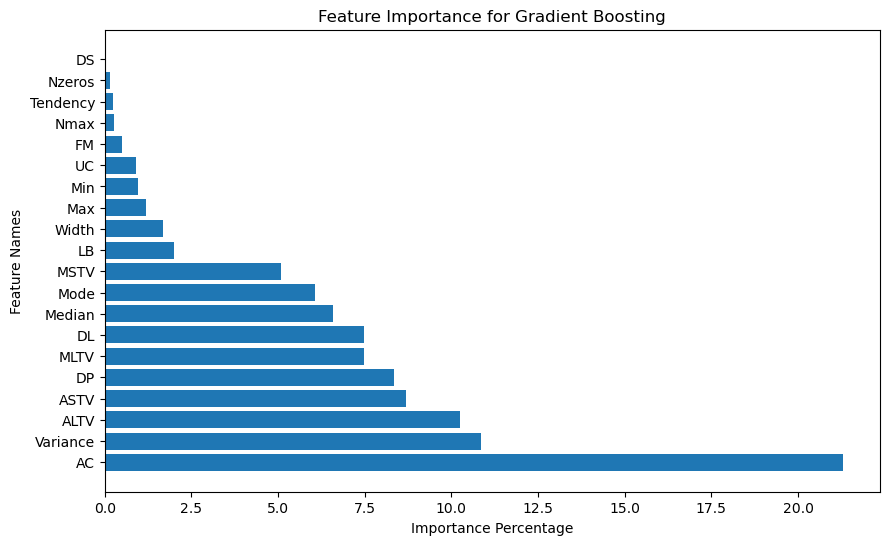

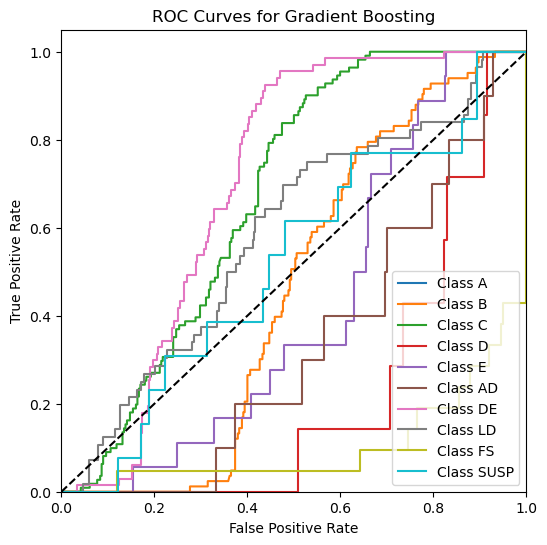

C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


Metrics for Random Forest:
Classification Report:
              precision    recall  f1-score   support

           1       0.73      0.86      0.79        71
           2       0.82      0.96      0.88        95
           3       1.00      0.70      0.82        10
           4       0.83      0.88      0.86        17
           5       0.50      0.29      0.37        17
           6       0.91      0.92      0.92        66
           7       0.93      0.93      0.93        56
           8       0.95      0.91      0.93        22
           9       1.00      0.46      0.63        28
          10       0.76      0.68      0.72        41

    accuracy                           0.83       423
   macro avg       0.84      0.76      0.79       423
weighted avg       0.84      0.83      0.83       423




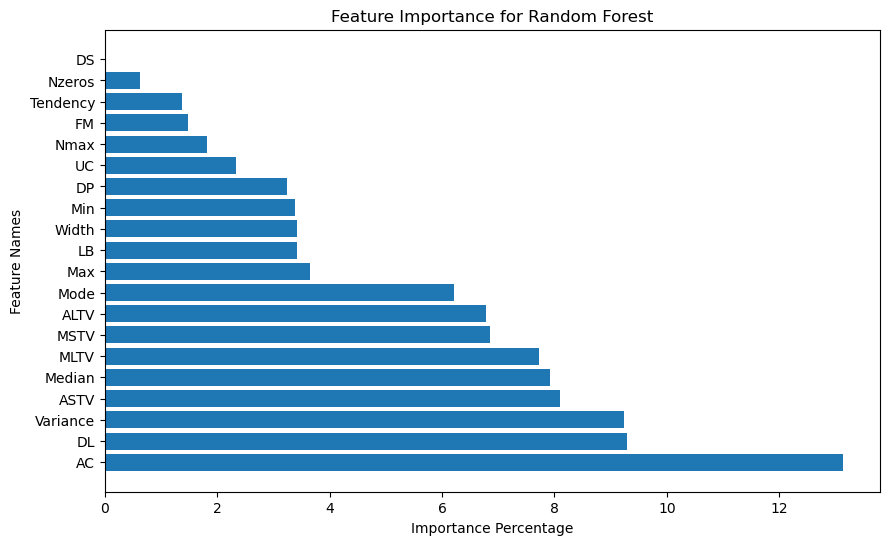

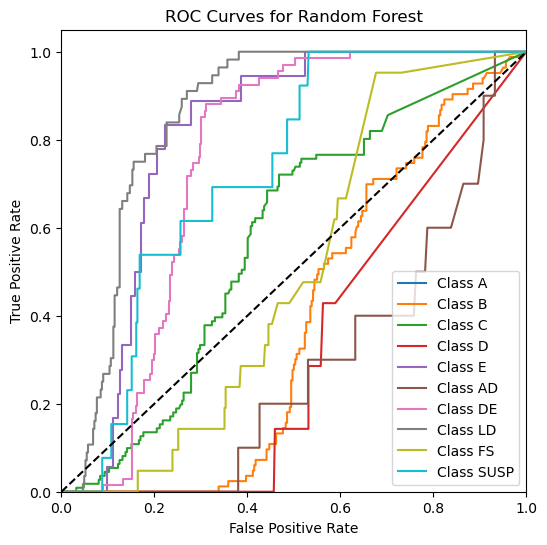

Metrics for SVM:
Classification Report:
              precision    recall  f1-score   support

           1       0.76      0.79      0.77        80
           2       0.83      0.93      0.88        99
           3       1.00      0.78      0.88         9
           4       0.94      0.81      0.87        21
           5       0.80      0.57      0.67        14
           6       0.82      0.90      0.86        61
           7       0.95      0.91      0.93        58
           8       0.90      0.95      0.93        20
           9       0.85      0.44      0.58        25
          10       0.70      0.72      0.71        36

    accuracy                           0.83       423
   macro avg       0.86      0.78      0.81       423
weighted avg       0.83      0.83      0.83       423




C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


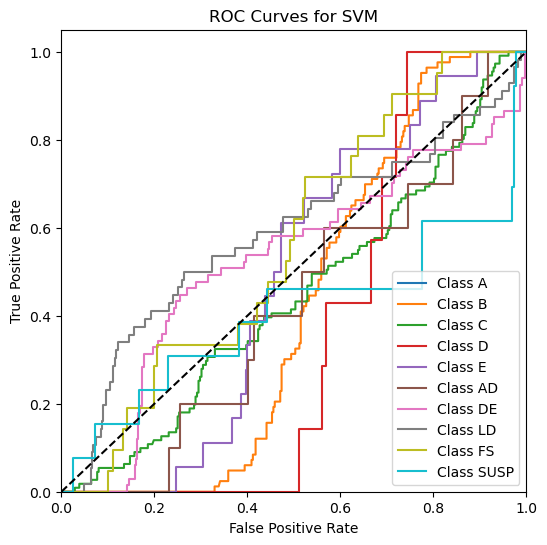

Metrics for VotingClassifier:
Classification Report:
              precision    recall  f1-score   support

           1       0.69      0.85      0.76        67
           2       0.82      0.99      0.90        92
           3       1.00      0.58      0.74        12
           4       1.00      0.95      0.97        19
           5       0.60      0.30      0.40        20
           6       0.93      0.93      0.93        67
           7       0.95      0.95      0.95        56
           8       1.00      0.95      0.98        22
           9       1.00      0.46      0.63        28
          10       0.73      0.68      0.70        40

    accuracy                           0.84       423
   macro avg       0.87      0.76      0.80       423
weighted avg       0.85      0.84      0.83       423




C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


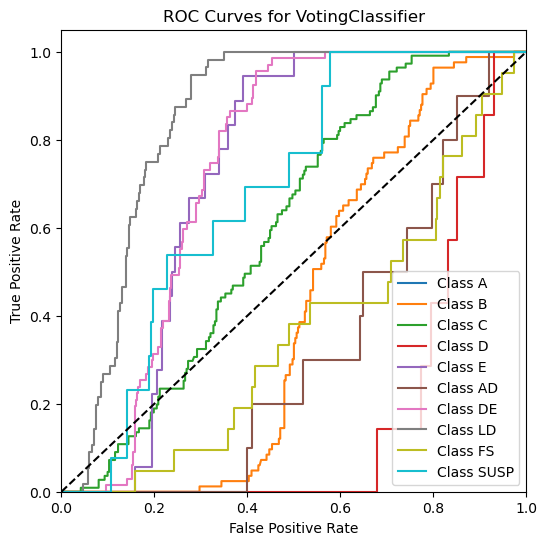

<Figure size 1000x600 with 0 Axes>

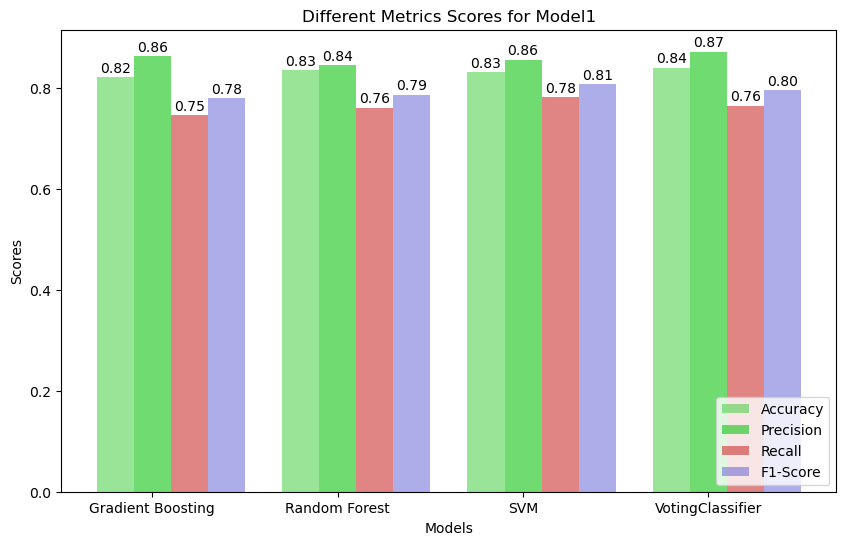

C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


Metrics for Gradient Boosting:
Classification Report:
              precision    recall  f1-score   support

           1       0.44      1.00      0.61       148
           2       0.61      0.20      0.30       156
           3       1.00      0.29      0.44       119

    accuracy                           0.50       423
   macro avg       0.68      0.49      0.45       423
weighted avg       0.66      0.50      0.45       423




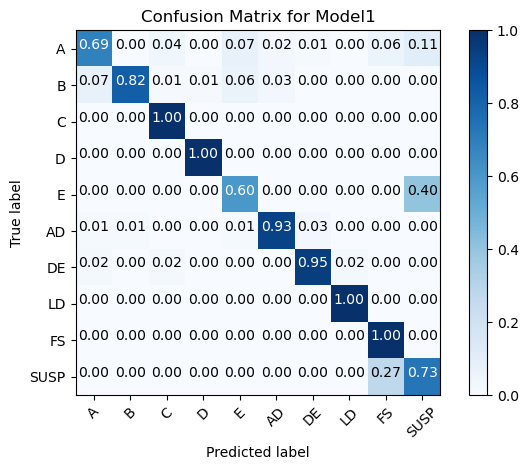

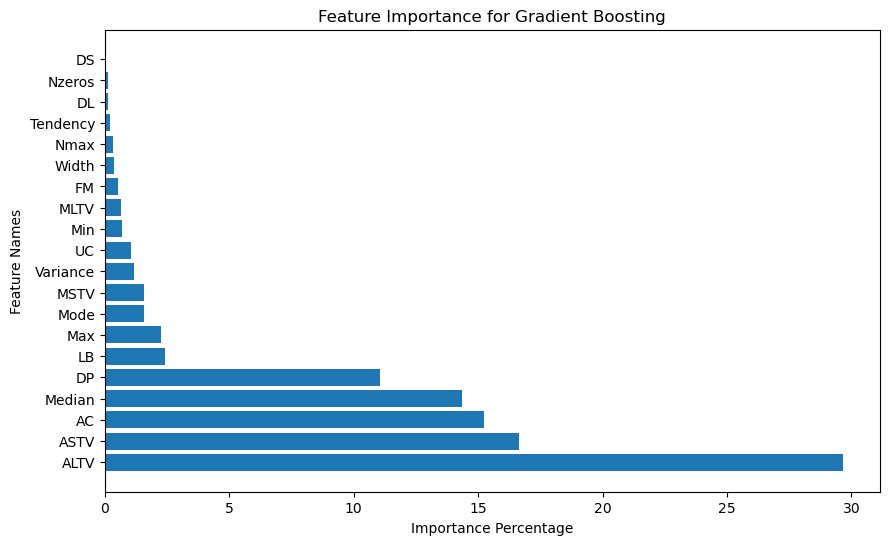

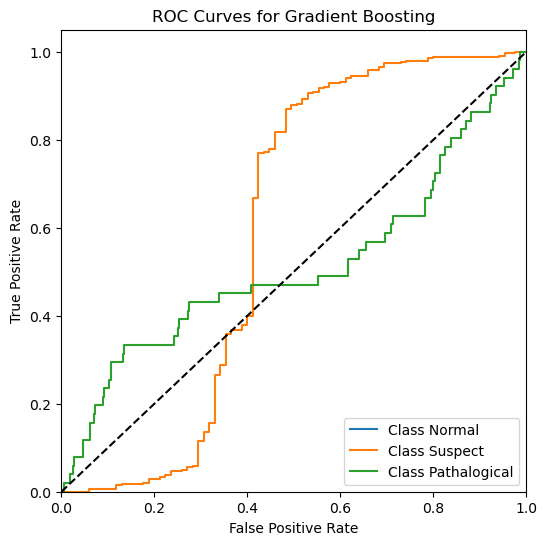

C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


Metrics for Random Forest:
Classification Report:
              precision    recall  f1-score   support

           1       0.65      1.00      0.79       220
           2       0.65      0.31      0.42       108
           3       1.00      0.36      0.53        95

    accuracy                           0.68       423
   macro avg       0.77      0.55      0.58       423
weighted avg       0.73      0.68      0.63       423




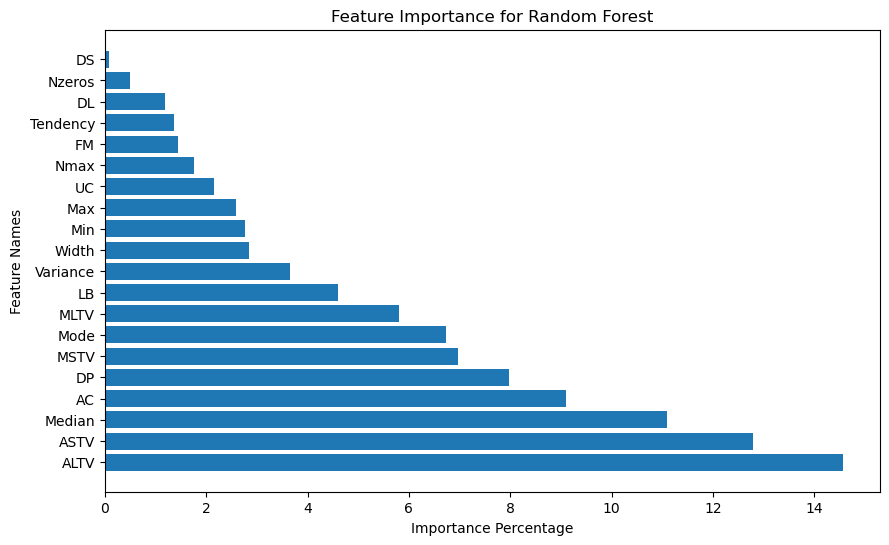

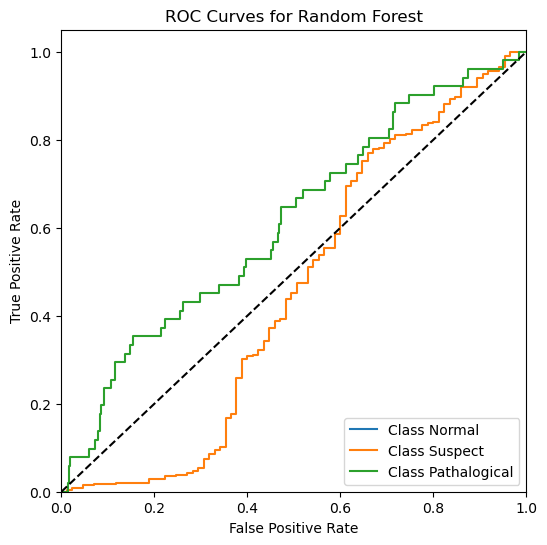

Metrics for SVM:
Classification Report:
              precision    recall  f1-score   support

           1       0.78      0.99      0.88       267
           2       0.63      0.38      0.47        84
           3       0.94      0.44      0.60        72

    accuracy                           0.78       423
   macro avg       0.78      0.61      0.65       423
weighted avg       0.78      0.78      0.75       423




C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


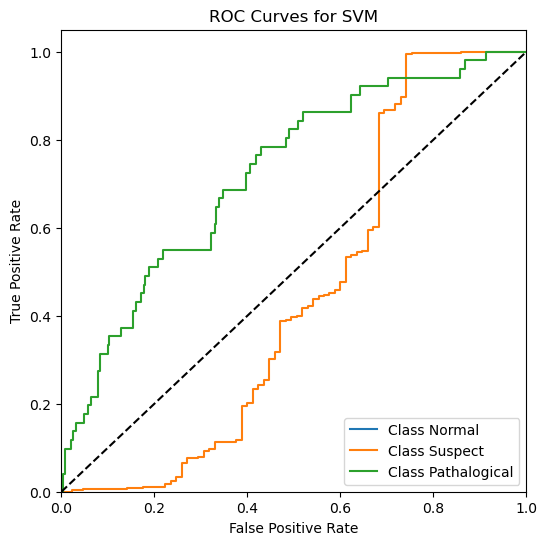

Metrics for VotingClassifier:
Classification Report:
              precision    recall  f1-score   support

           1       0.61      1.00      0.76       207
           2       0.63      0.26      0.37       121
           3       1.00      0.36      0.53        95

    accuracy                           0.65       423
   macro avg       0.75      0.54      0.55       423
weighted avg       0.70      0.65      0.60       423




C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


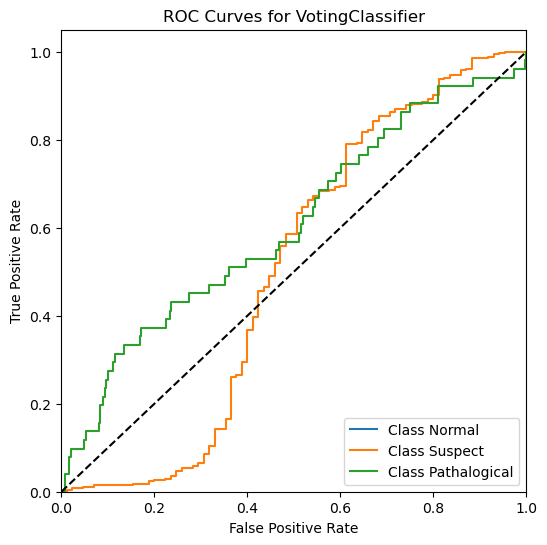

<Figure size 1000x600 with 0 Axes>

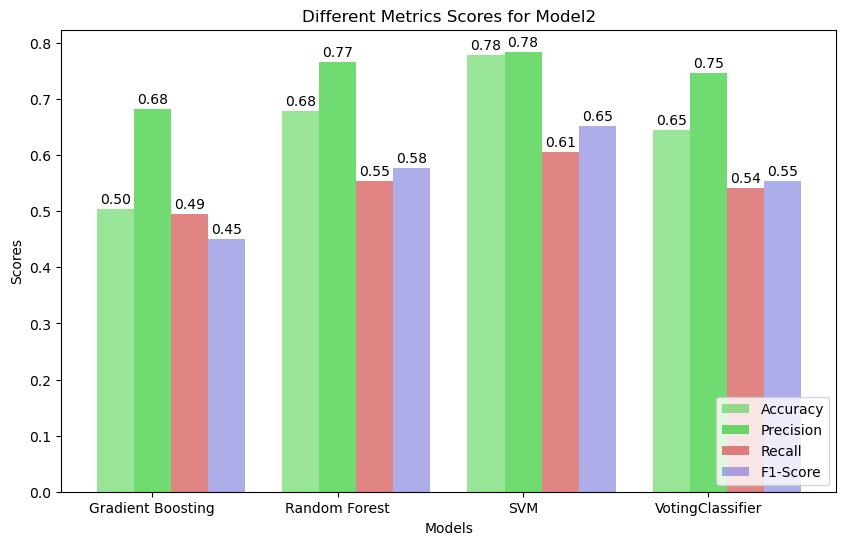

Metrics for Gradient Boosting:
Classification Report:
              precision    recall  f1-score   support

           1       0.57      1.00      0.73       194
           2       0.78      0.30      0.43       133
           3       0.26      0.09      0.14        96

    accuracy                           0.57       423
   macro avg       0.54      0.46      0.43       423
weighted avg       0.57      0.57      0.50       423




C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


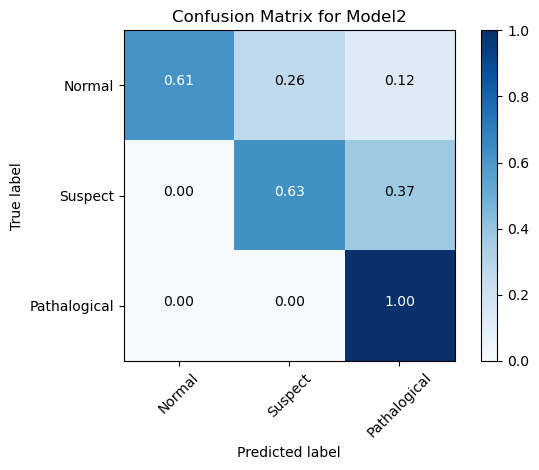

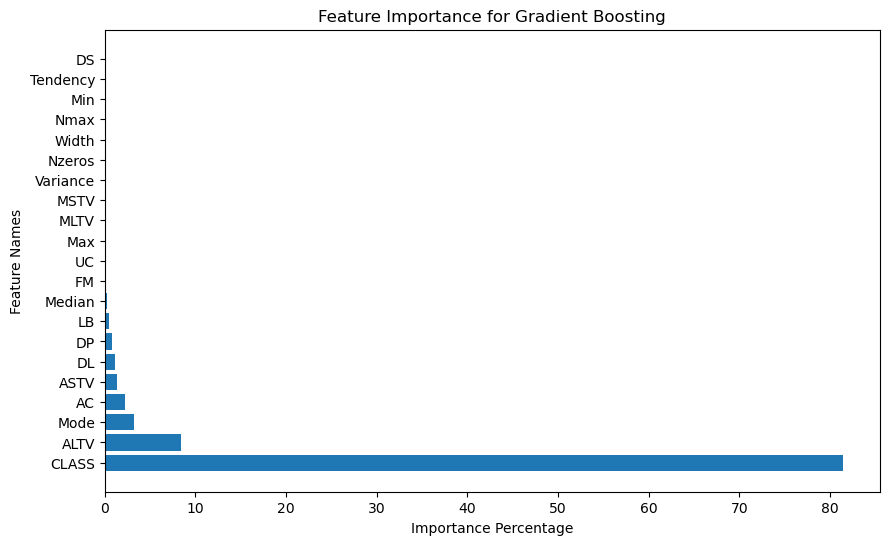

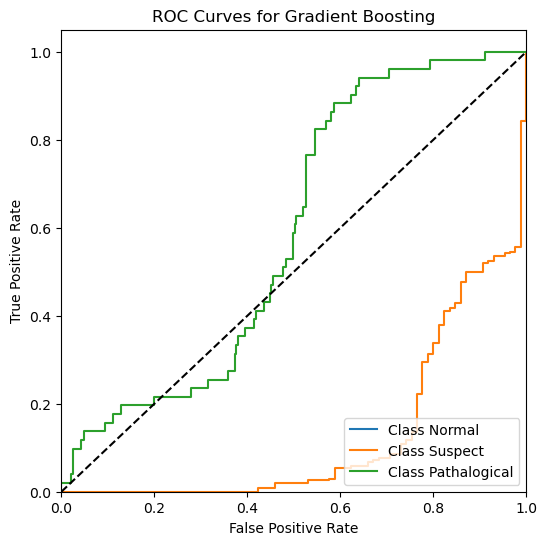

C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


Metrics for Random Forest:
Classification Report:
              precision    recall  f1-score   support

           1       0.61      1.00      0.76       206
           2       0.82      0.36      0.50       118
           3       0.88      0.30      0.45        99

    accuracy                           0.66       423
   macro avg       0.77      0.55      0.57       423
weighted avg       0.73      0.66      0.61       423




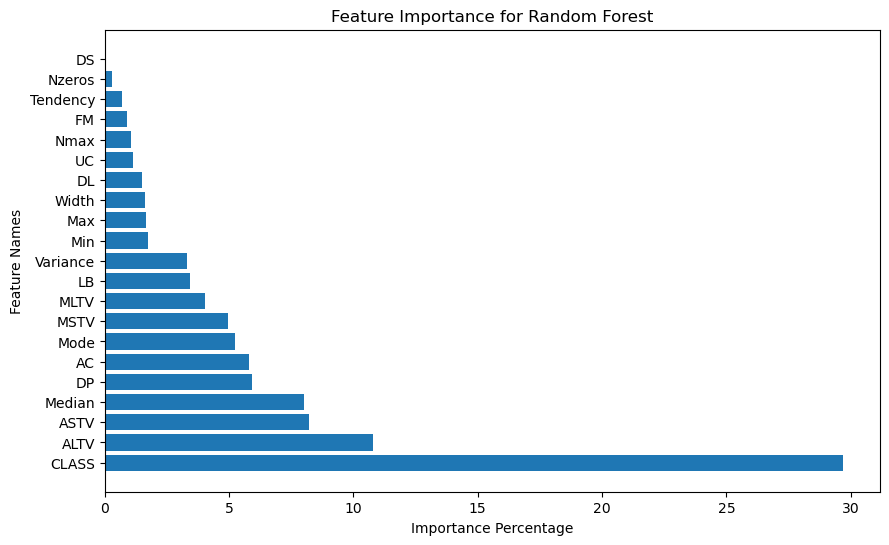

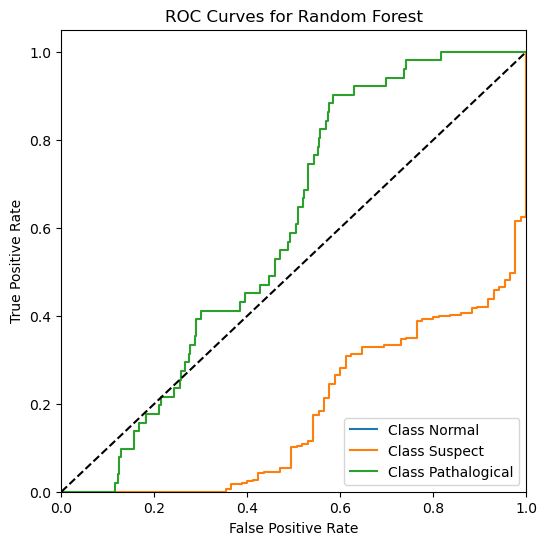

Metrics for SVM:
Classification Report:
              precision    recall  f1-score   support

           1       0.73      0.99      0.84       250
           2       0.86      0.42      0.56       106
           3       0.88      0.45      0.59        67

    accuracy                           0.76       423
   macro avg       0.83      0.62      0.66       423
weighted avg       0.79      0.76      0.73       423




C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


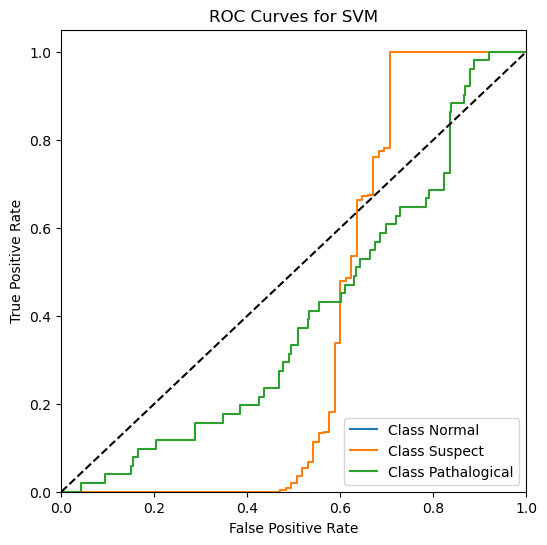

Metrics for VotingClassifier:
Classification Report:
              precision    recall  f1-score   support

           1       0.65      1.00      0.79       222
           2       0.92      0.39      0.55       119
           3       0.88      0.37      0.52        82

    accuracy                           0.70       423
   macro avg       0.82      0.59      0.62       423
weighted avg       0.77      0.70      0.67       423




C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


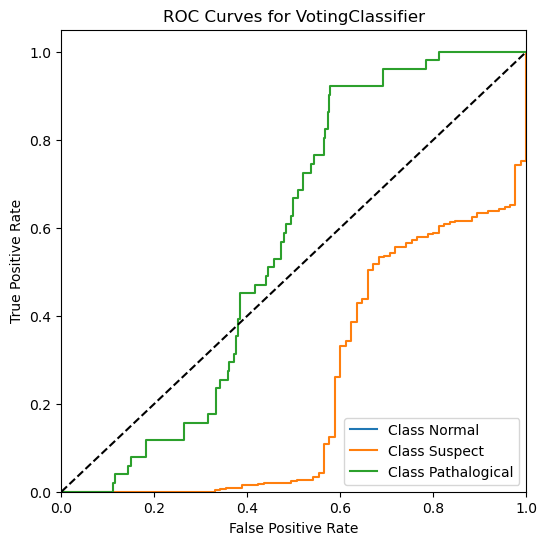

<Figure size 1000x600 with 0 Axes>

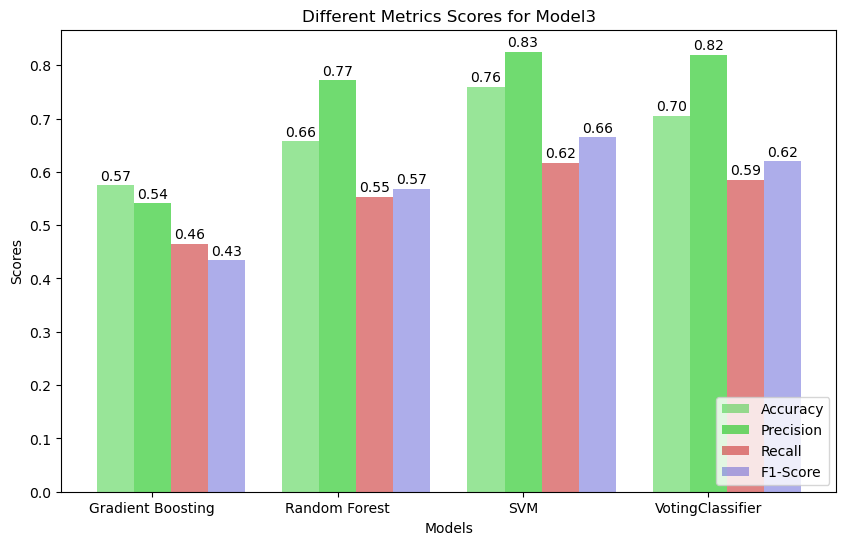

C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


Metrics for Gradient Boosting:
Classification Report:
              precision    recall  f1-score   support

           1       0.70      0.89      0.78        65
           2       0.68      0.99      0.80        76
           3       1.00      0.35      0.52        20
           4       0.94      0.94      0.94        18
           5       0.70      0.14      0.24        49
           6       0.91      0.92      0.92        66
           7       0.93      0.95      0.94        55
           8       1.00      1.00      1.00        21
           9       1.00      0.34      0.51        38
          10       0.35      0.87      0.50        15

    accuracy                           0.77       423
   macro avg       0.82      0.74      0.72       423
weighted avg       0.81      0.77      0.73       423




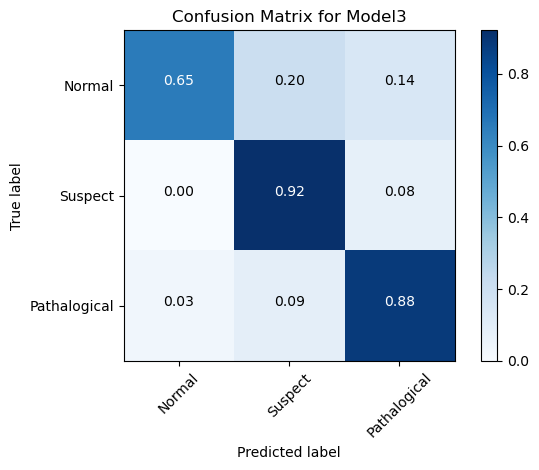

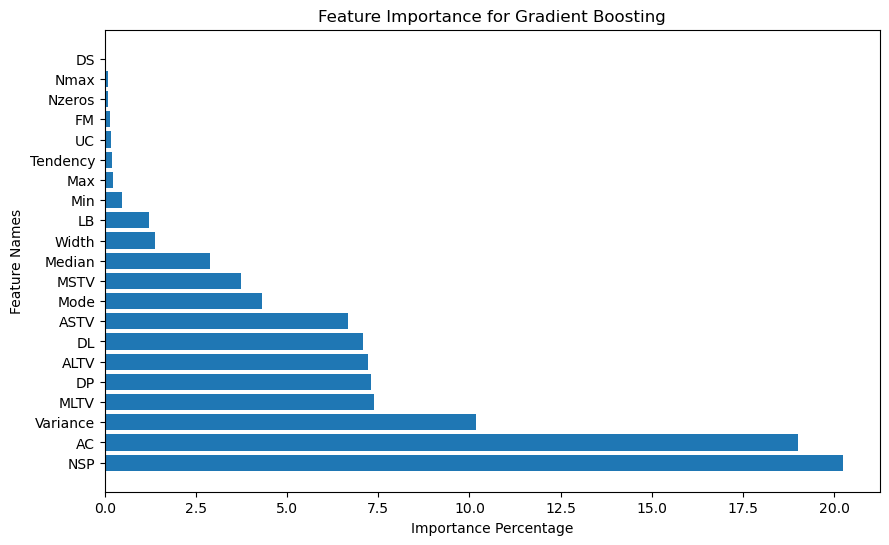

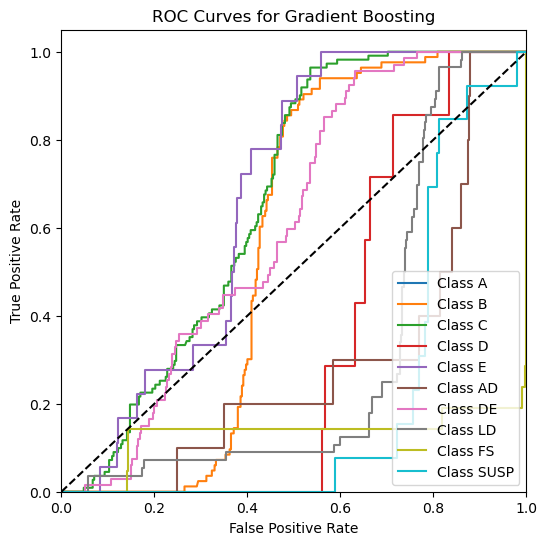

C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


Metrics for Random Forest:
Classification Report:
              precision    recall  f1-score   support

           1       0.76      0.85      0.80        74
           2       0.81      0.97      0.88        93
           3       0.86      0.67      0.75         9
           4       0.89      0.94      0.91        17
           5       0.60      0.23      0.33        26
           6       0.87      0.92      0.89        63
           7       0.89      0.88      0.88        57
           8       1.00      0.84      0.91        25
           9       1.00      0.27      0.43        48
          10       0.14      0.45      0.21        11

    accuracy                           0.78       423
   macro avg       0.78      0.70      0.70       423
weighted avg       0.83      0.78      0.77       423




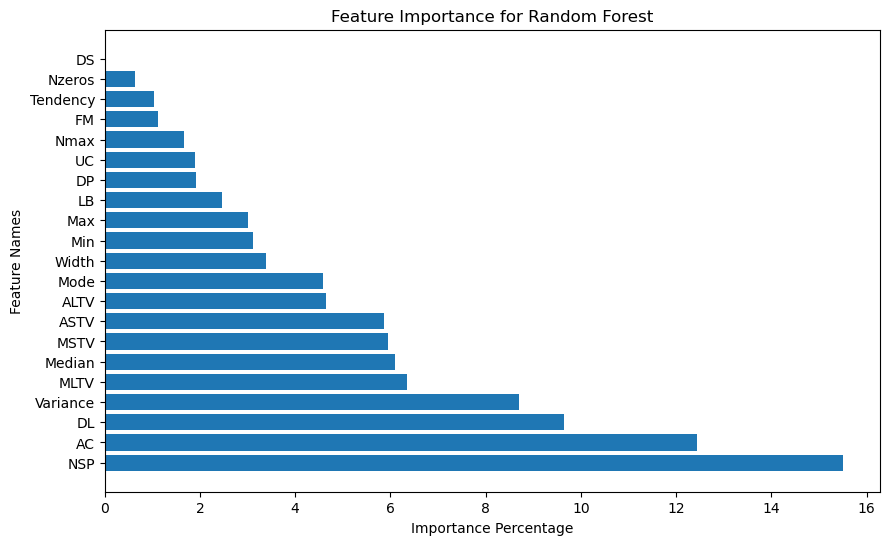

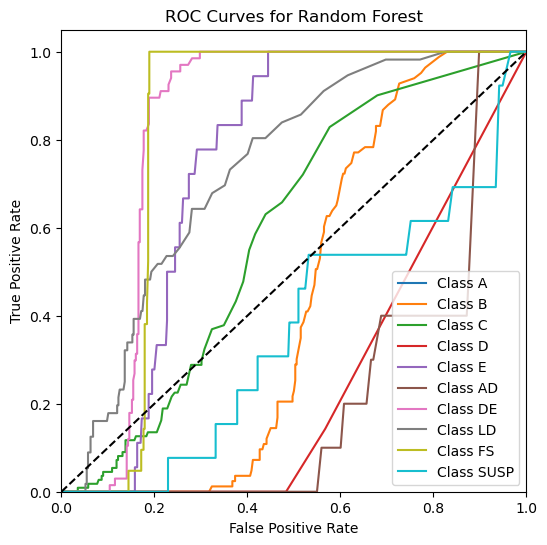

Metrics for SVM:
Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.85      0.89        92
           2       0.85      0.92      0.88       102
           3       1.00      0.78      0.88         9
           4       0.94      0.85      0.89        20
           5       0.90      0.69      0.78        13
           6       0.79      0.90      0.84        59
           7       0.93      0.91      0.92        57
           8       0.95      0.95      0.95        21
           9       1.00      0.43      0.60        30
          10       0.51      0.95      0.67        20

    accuracy                           0.86       423
   macro avg       0.88      0.82      0.83       423
weighted avg       0.88      0.86      0.85       423




C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


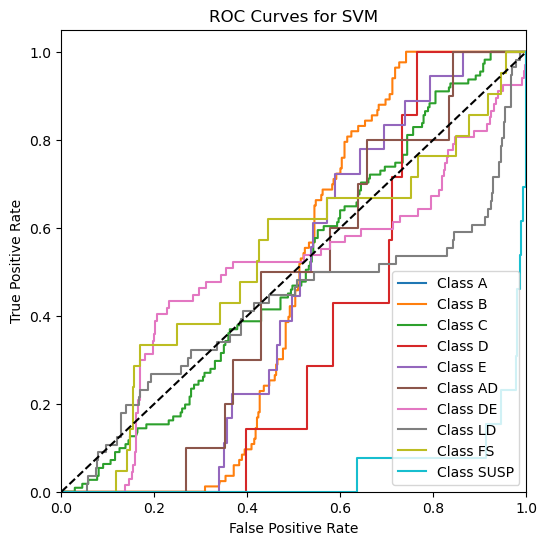

Metrics for VotingClassifier:
Classification Report:
              precision    recall  f1-score   support

           1       0.93      0.87      0.90        89
           2       0.81      0.97      0.88        93
           3       1.00      0.70      0.82        10
           4       0.94      0.81      0.87        21
           5       0.80      0.44      0.57        18
           6       0.87      0.92      0.89        63
           7       0.93      0.95      0.94        55
           8       1.00      0.95      0.98        22
           9       1.00      0.38      0.55        34
          10       0.43      0.89      0.58        18

    accuracy                           0.85       423
   macro avg       0.87      0.79      0.80       423
weighted avg       0.88      0.85      0.84       423




C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


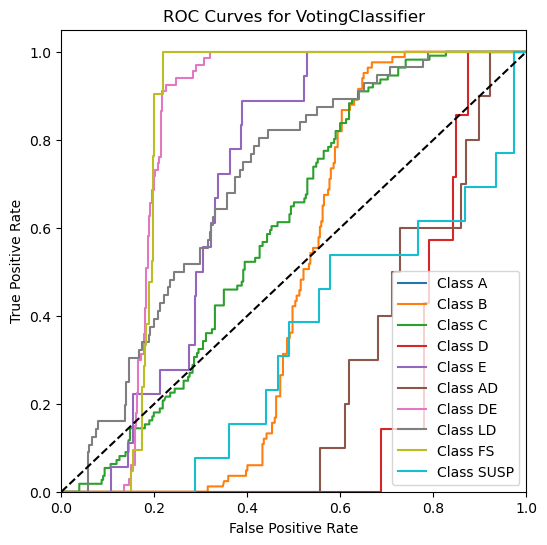

<Figure size 1000x600 with 0 Axes>

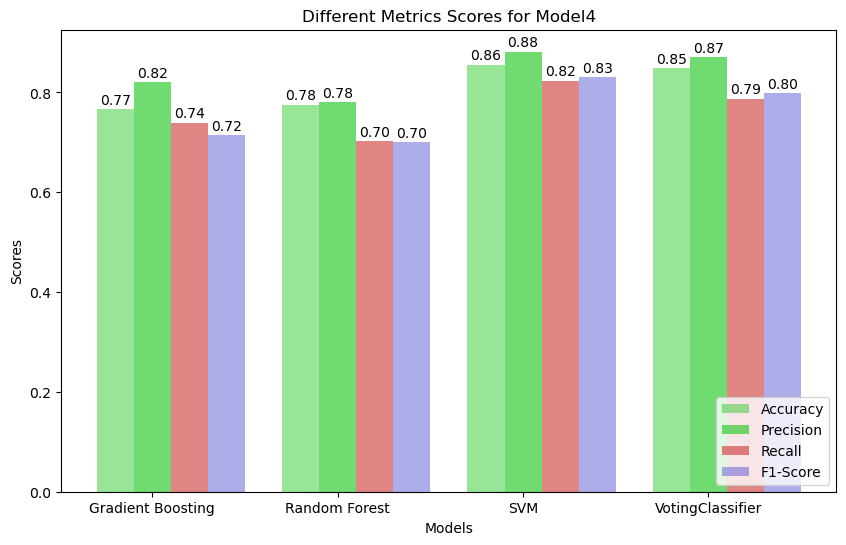

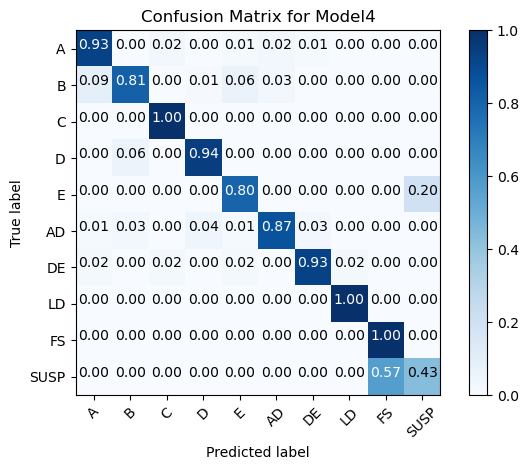

In [19]:
Ensemble_model1(X_train1, y_class_train1, X_test1, y_class_test1, 'Model1', column_names_model1_2)
Ensemble_model2(X_train2, y_nsp_train2, X_test2, y_nsp_test2, 'Model2', column_names_model1_2)
Ensemble_model3(X_train3, y_nsp_train3, X_test3, y_nsp_test3, 'Model3', column_names_model3)
Ensemble_model4(X_train4, y_class_train4, X_test4, y_class_test4, 'Model4', column_names_model4)

